<a href="https://colab.research.google.com/github/anjali0503/Training-and-Testing/blob/master/Salary_Dataset_using_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
data = pd.read_csv("/content/Salary.csv")

In [15]:
print(data)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5 

In [16]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [17]:
data.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [18]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [19]:
data.shape

(35, 2)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) : 
        self.learning_rate = learning_rate
        self.iterations = iterations
   
    def fit( self, X, Y ) :
        self.m, self.n = X.shape        
        self.W = np.zeros( self.n )        
        self.b = 0       
        self.X = X  
        self.Y = Y
        for i in range( self.iterations ) :   
            self.update_weights()      
        return self

    def update_weights( self ) :   
        Y_pred = self.predict( self.X )
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    def predict( self, X ) :
        return X.dot( self.W ) + self.b
  

Predicted values: [121279.44  89061.72  74258.99]
Real values: [121872  91738  66029]
Trained b: 29850.79
Trained W: 8707.49


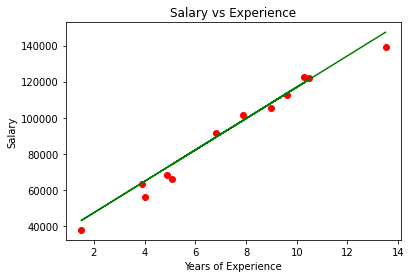

In [22]:
def main() :
  df = pd.read_csv( "Salary.csv" )
  X = df.iloc[:,:-1].values
  Y = df.iloc[:,1].values
  X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/3, random_state = 0 )
  model = LinearRegression( iterations = 1000, learning_rate = 0.01 )
  model.fit( X_train, Y_train )
  Y_pred = model.predict( X_test )
  print( "Predicted values:", np.round( Y_pred[:3], 2 ))
  print( "Real values:", Y_test[:3])
  print( "Trained b:", round( model.b,2 ))
  print( "Trained W:", round( model.W[0], 2 ))
  plt.scatter( X_test, Y_test, color = 'red' )
  plt.plot( X_test, Y_pred,color = 'green' )
  plt.xlabel( 'Years of Experience')
  plt.ylabel( 'Salary' )
  plt.title( 'Salary vs Experience' )
  plt.show()
if __name__ == "__main__" :
  main()